In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('~/spiced/nigela-network-encounter-notes/data/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Description of the data
#--Categorical data = Pclass, Sex, SibSp(Sibling/spouse), Parch(Parent with child), Embarked
#--String = Name
#--Numerical data = Age, Fare

In [5]:
#replace 
##change variable sex into numerical 
##set 1 for male and 0 for female
#data['Sex_fact']=pd.factorize(data['Sex'])[0]
#data['Sex']=data['Sex'].replace('male', 1)
#data['Sex']=data['Sex'].replace('female', 0)
#data.head()


Data Exploration 

In [6]:
#number of survived/non-survived passenger
survived=data['Survived'].sum()
non_survived=len(data['Survived']) - survived
print (survived, non_survived)

342 549


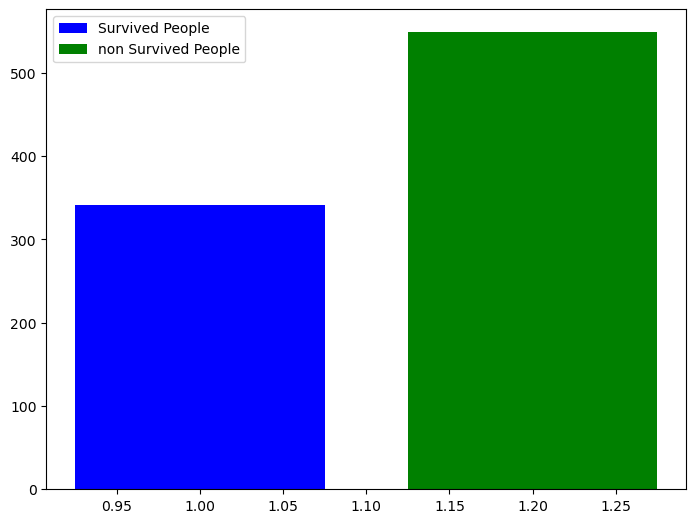

In [7]:
# Plot of survived/non survived passenger
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(1,survived, color = 'b', width = 0.15, label='Survived People')
ax.bar(1.2, non_survived, color = 'g', width = 0.15, label='non Survived People')
plt.legend()
plt.show()

In [8]:
#Toltal number of passenger in first class

firs_class=(data['Pclass']==1).sum()

In [9]:
#proportion of surviving 1st class passengers with regards to the total number of 1st class passengers
f_data=data[data['Pclass']==1]
prop_first_surv = ((f_data['Survived']==1).sum()/firs_class)*100

In [10]:
prop_first_surv

62.96296296296296

In [11]:
# bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

In [12]:
#histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

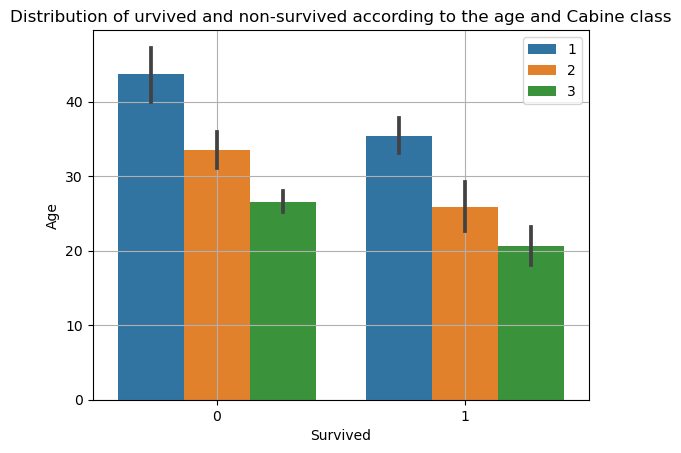

In [13]:
#data['Age'].hist()
fig = plt.figure()
sns.barplot(data=data, x='Survived', y='Age', hue='Pclass')
plt.title('Distribution of urvived and non-survived according to the age and Cabine class')
plt.legend()
plt.grid()

In [14]:
#average age for survived and drowned passengers
surv=data[data['Survived']==1]
non_sur=data[data['Survived']==0]

In [15]:
av_age_surv=round(surv['Age'].mean())
av_age_n_surv=round(non_sur['Age'].mean())

In [16]:
av_age_surv

28

In [17]:
av_age_n_surv

31

In [18]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Scatterplot of suvived non survived 

In [20]:
#sns.scatterplot(x='Survived', y=

In [21]:
#print(data.mean())
#data_fill=data.fillna(data.mean()) ### replace nan value with he mean of the column
#data_fill.isna().sum()

Transformation & Pipeline 


In [22]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import confusion_matrix

<AxesSubplot:>

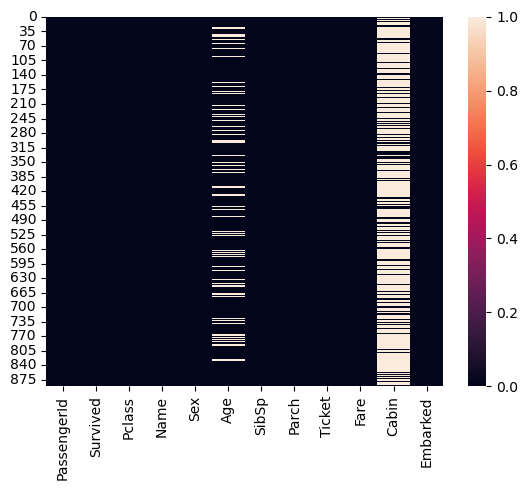

In [23]:
#Heatmap of missing value
sns.heatmap(data.isna())

In [24]:
# drop column that are not part of the workflow (Cabin, PassengerID, Ticket)
data.drop(columns=['Cabin','Ticket','PassengerId'], inplace=True)
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


Split data - Train / Test

In [25]:
#define X and Y
y=data['Survived']
X=data.drop('Survived', axis=1)

In [26]:
#Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

Feature engineering with Pipeline

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn import set_config
set_config(display="diagram") ###displays diagram from the output of the column/feature transformation

In [28]:
#Transform column using  pipeline /defining the pipeline to use on the data

In [29]:
##Categorical data
cat_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),    # this one will transform categorical features
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
                         

In [30]:
##Numerical data
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),    #this one will transform numerical features and scale the output 
                         MinMaxScaler())

In [31]:
### Create custom function that go through the name and extract title (Mr, Mrs, Miss)

def name_length(df):
    length = df[df.columns[0]].str.len()
    return length.values.reshape(-1, 1)

In [32]:
#Tansform the column features of the data
column_transform = ColumnTransformer(     # we are combining num_pipe, cat_pipe, Function Transformer 
    transformers=[
        ("num", num_pipe, ['Age', 'Fare']),
        ("cat", cat_pipe, ['Pclass', 'Embarked', 'Parch','Sex']),
        ("name", FunctionTransformer(name_length), ['Name']),
        ("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'
#

In [33]:
column_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x7f237cc588b0>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [34]:
#creation of model pipeline - apply logistic regression on the feature we transformed 
# max iteration for the logisticRegression to search for optimum parameter

pipeline = make_pipeline(column_transform, LogisticRegression(max_iter=400))

In [35]:
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pclass', 'Embarked',
                                                   'Parch', 'Sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f237cc588b0>),
                                                  ['Name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(max_iter=400))])

Train the model

In [36]:
#feed our data to transform and train the model
pipeline.fit(X_train, y_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Pclass', 'Embarked',
                                                   'Parch', 'Sex']),
                                                 ('name',
                                                  FunctionTransformer(func=<function name_length at 0x7f237cc588b0>),
                                                  ['Name']),
                                                 ('do_nothing', 'passthrough',
                                                  ['SibSp'])])),
                ('logisticregression', LogisticRegression(max_iter=400))])

In [37]:
#Check score / accuracy of the model 

In [38]:
#train data
pipeline.score(X_train, y_train)

0.797752808988764

In [39]:
#check model score using test data
pipeline.score(X_test, y_test)

0.7877094972067039

In [40]:
#Check model parameters
#

Do prediction with model parameter

In [41]:
# get predictions from the pipeline
y_pred = pipeline.predict(X_test) ###Predict y (survived or not) using Test data accuracy of that prediction will be to compare 
                                    #### y_test and y_pred
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

Evaluation of LogisticRegression output

In [42]:
##Transfom matrix to list
y_pred=y_pred.tolist()


In [43]:
#import the new list into dataframe ---
df1 = pd.DataFrame(y_pred, columns=['y_pred'])
df1


,y_pred
0,0
1,0
2,0
3,1
4,1
...,...
174,0
175,0
176,0
177,1


In [44]:
#tranform y_test serie data to dataframe and reset the index
df_y_test=y_test.to_frame()
df_y_test.reset_index(inplace=True)
df_y_test

,index,Survived
0,709,1
1,439,0
2,840,0
3,720,1
4,39,1
...,...,...
174,433,0
175,773,0
176,25,1
177,84,1


In [45]:
#add y_pred and y_test into the same dataframe
df_y_test['y_pred']=df1['y_pred']
df_y_test

,index,Survived,y_pred
0,709,1,0
1,439,0,0
2,840,0,0
3,720,1,1
4,39,1,1
...,...,...,...
174,433,0,0
175,773,0,0
176,25,1,0
177,84,1,1


In [46]:
h=df_y_test.drop('index', axis=1)

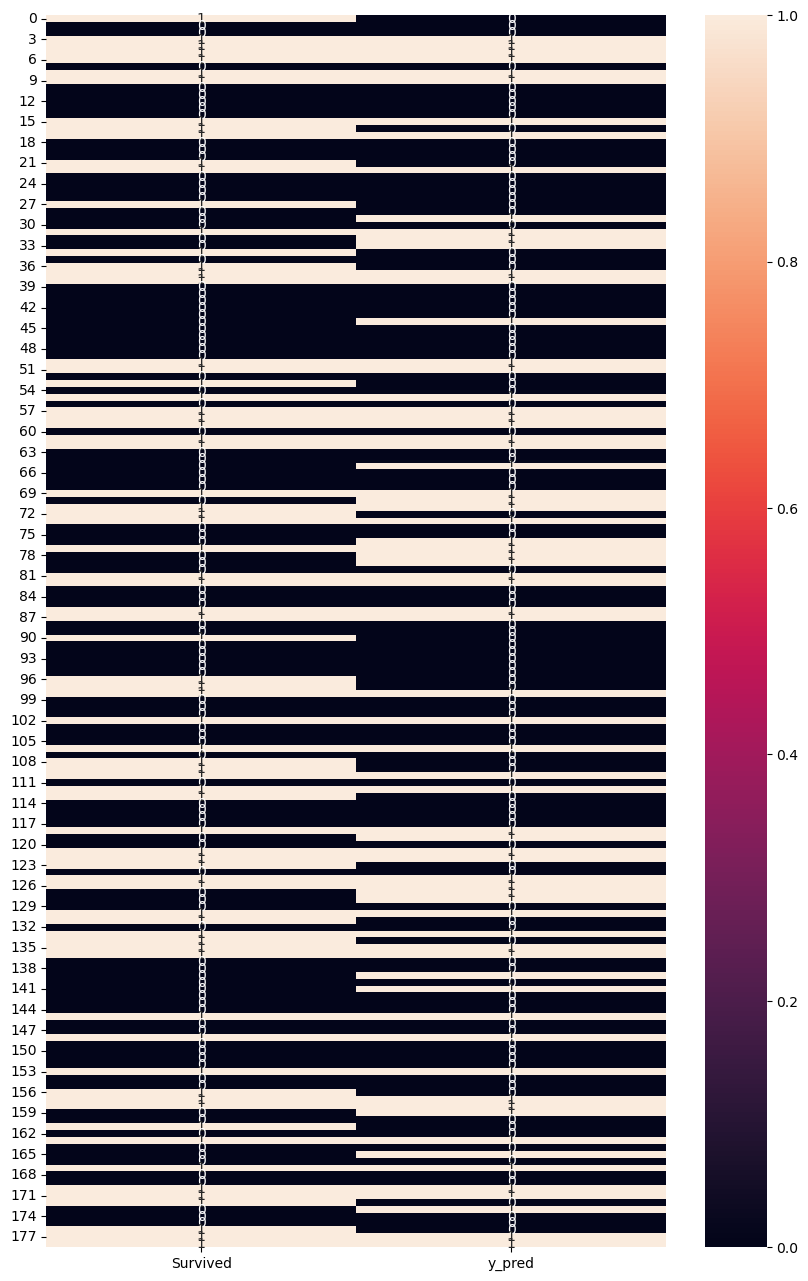

In [47]:
#create a heatmap of the y_test and y_pred

fig= plt.figure(figsize=(10, 16))
sns.heatmap(h, annot=True)
plt.show()



In [48]:

# get prediction probabilities from the pipeline 
proba = pipeline.predict_proba(X_test)


In [49]:

#proba

array([[0.69834706, 0.30165294],
       [0.68688201, 0.31311799],
       [0.87924723, 0.12075277],
       [0.07142837, 0.92857163],
       [0.31703213, 0.68296787],
       [0.10933151, 0.89066849],
       [0.24876936, 0.75123064],
       [0.92365937, 0.07634063],
       [0.27286471, 0.72713529],
       [0.10453052, 0.89546948],
       [0.72019523, 0.27980477],
       [0.93887513, 0.06112487],
       [0.58843342, 0.41156658],
       [0.85815763, 0.14184237],
       [0.77988323, 0.22011677],
       [0.06230873, 0.93769127],
       [0.73438037, 0.26561963],
       [0.30526733, 0.69473267],
       [0.75814955, 0.24185045],
       [0.67099796, 0.32900204],
       [0.91258181, 0.08741819],
       [0.63864464, 0.36135536],
       [0.34935855, 0.65064145],
       [0.8790803 , 0.1209197 ],
       [0.9036144 , 0.0963856 ],
       [0.94342318, 0.05657682],
       [0.55028246, 0.44971754],
       [0.77203473, 0.22796527],
       [0.94675102, 0.05324898],
       [0.49502637, 0.50497363],
       [0.

In [50]:
# access regression coefficient 
pipeline.named_steps['logisticregression'].coef_

array([[-1.53738917,  0.61926705,  0.72608944,  0.18849398, -0.93769557,
         0.19310375,  0.15001847, -0.36623438,  0.24845016,  0.79384441,
         0.22703897,  0.59776913, -0.79056174, -0.75582395, -0.34382913,
         1.20023644, -1.2233486 ,  0.02572209, -0.35007931]])

In [51]:
# access regression intercept
pipeline.named_steps['logisticregression'].intercept_

array([-0.03230631])

In [52]:
#confusion matrix - does not work on pipeline - data need to transform separately then call the model on the transform data

In [53]:
column_transform

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Pclass', 'Embarked', 'Parch', 'Sex']),
                                ('name',
                                 FunctionTransformer(func=<function name_length at 0x7f237cc588b0>),
                                 ['Name']),
                                ('do_nothing', 'passthrough', ['SibSp'])])

In [54]:
#Transformation of the data
X_train_trans= column_transform.fit_transform(X_train)


/home/ayouba/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
#transform X_test data but Transforming X_test without fitting the transformer on it!!!
X_test_trans = column_transform.transform(X_test)


In [56]:
#X_test_trans

array([[3.65403948e-01, 2.97578198e-02, 0.00000000e+00, ...,
        1.00000000e+00, 4.90000000e+01, 1.00000000e+00],
       [3.84267404e-01, 2.04946351e-02, 0.00000000e+00, ...,
        1.00000000e+00, 3.80000000e+01, 0.00000000e+00],
       [2.46041719e-01, 1.54685698e-02, 0.00000000e+00, ...,
        1.00000000e+00, 2.70000000e+01, 0.00000000e+00],
       ...,
       [4.72229203e-01, 6.12643199e-02, 0.00000000e+00, ...,
        0.00000000e+00, 5.70000000e+01, 1.00000000e+00],
       [2.08343805e-01, 2.04946351e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.90000000e+01, 0.00000000e+00],
       [4.49861774e-02, 3.25962291e-02, 0.00000000e+00, ...,
        0.00000000e+00, 3.10000000e+01, 1.00000000e+00]])

In [57]:
#call the Logistic_regeression on transform data
mod = LogisticRegression(max_iter=400)


In [58]:
mod.fit(X_train_trans, y_train)

LogisticRegression(max_iter=400)

In [59]:
#compare the score from previous method
mod.score(X_train_trans, y_train)

0.797752808988764

In [60]:
mod.score(X_test_trans, y_test)

0.7877094972067039

In [253]:
#Precision 
metrics.precision_score(y_test, y_pred)

0.7571428571428571

In [61]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [195]:
#model coefficient
mod.coef_

array([[-1.53738917,  0.61926705,  0.72608944,  0.18849398, -0.93769557,
         0.19310375,  0.15001847, -0.36623438,  0.24845016,  0.79384441,
         0.22703897,  0.59776913, -0.79056174, -0.75582395, -0.34382913,
         1.20023644, -1.2233486 ,  0.02572209, -0.35007931]])

In [196]:
#model intercept
mod.intercept_

array([-0.03230631])

In [62]:
cm_disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                         display_labels=mod.classes_)

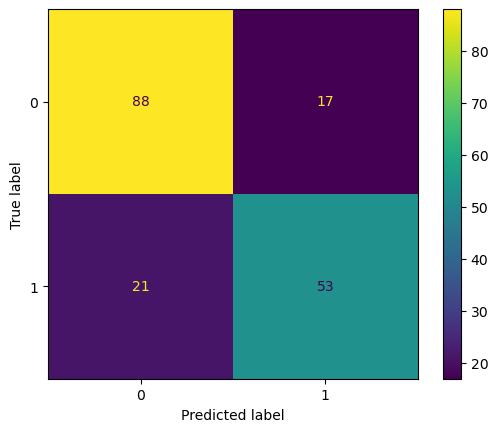

In [63]:
cm_disp.plot()

In [140]:
##ROC curve

In [150]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay



In [205]:
#Estimation of fals positive and true positive
#fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=mod.classes_[1])
y_score = mod.decision_function(X_test_trans)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=mod.classes_[1])
roc_auc = metrics.auc(fpr, tpr)
roc_disp = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='logistic regression')

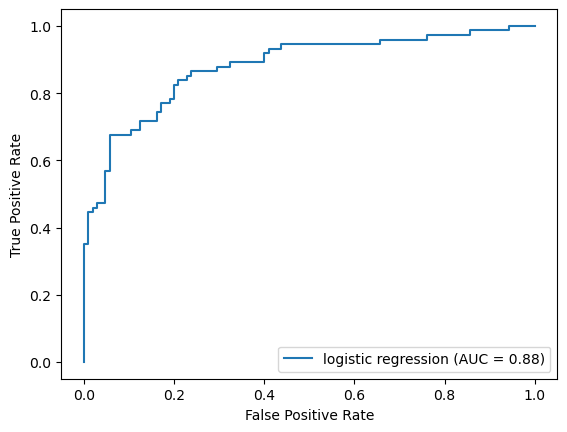

In [206]:
#Display graph
#roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
roc_disp.plot()

In [153]:
#fpr

array([0.        , 0.        , 0.        , 0.00952381, 0.00952381,
       0.01904762, 0.01904762, 0.02857143, 0.02857143, 0.04761905,
       0.04761905, 0.05714286, 0.05714286, 0.1047619 , 0.1047619 ,
       0.12380952, 0.12380952, 0.16190476, 0.16190476, 0.17142857,
       0.17142857, 0.19047619, 0.19047619, 0.2       , 0.2       ,
       0.20952381, 0.20952381, 0.22857143, 0.22857143, 0.23809524,
       0.23809524, 0.2952381 , 0.2952381 , 0.32380952, 0.32380952,
       0.4       , 0.4       , 0.40952381, 0.40952381, 0.43809524,
       0.43809524, 0.65714286, 0.65714286, 0.76190476, 0.76190476,
       0.85714286, 0.85714286, 0.94285714, 0.94285714, 1.        ])

Apply Decision Tree on Titanic Data

In [94]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from IPython.display import IFrame
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder

In [95]:
X_train1 = X_train

In [96]:
#Factorize categorical column 
X_train1[['Pclass', 'Embarked', 'Parch','Sex']] = X_train1[['Pclass', 'Embarked', 'Parch','Sex']].apply(lambda x: pd.factorize(x)[0])

In [97]:
X_train1

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
331,0,"Partner, Mr. Austen",0,45.5,0,0,28.5000,0
733,1,"Berriman, Mr. William John",0,23.0,0,0,13.0000,0
382,2,"Tikkanen, Mr. Juho",0,32.0,0,0,7.9250,0
704,2,"Hansen, Mr. Henrik Juul",0,26.0,1,0,7.8542,0
813,2,"Andersson, Miss. Ebba Iris Alfrida",1,6.0,4,1,31.2750,0
...,...,...,...,...,...,...,...,...
106,2,"Salkjelsvik, Miss. Anna Kristine",1,21.0,0,0,7.6500,0
270,0,"Cairns, Mr. Alexander",0,NaN,0,0,31.0000,0
860,2,"Hansen, Mr. Claus Peter",0,41.0,2,0,14.1083,0
435,0,"Carter, Miss. Lucile Polk",1,14.0,1,1,120.0000,0


In [98]:
#Tansform the column features of the data
column_transform1 = ColumnTransformer(     # we are combining num_pipe, cat_pipe, Function Transformer 
    transformers=[
        ("num", num_pipe, ['Age', 'Fare']),
        ("name", FunctionTransformer(name_length), ['Name']),
        ("do_nothing", 'passthrough', ['SibSp'])
    ]

)#remainder='passthrough', 'drop'
#

In [99]:
#transform train data using column transform define early
X_train_tr= column_transform1.fit_transform(X_train1)

In [102]:
#transform X_test data but Transforming X_test without fitting the transformer on it!!!
X_test_tr = column_transform1.transform(X_test)
#X_test_tr 

array([[3.65403948e-01, 2.97578198e-02, 4.90000000e+01, 1.00000000e+00],
       [3.84267404e-01, 2.04946351e-02, 3.80000000e+01, 0.00000000e+00],
       [2.46041719e-01, 1.54685698e-02, 2.70000000e+01, 0.00000000e+00],
       [7.01181201e-02, 6.44117103e-02, 3.30000000e+01, 0.00000000e+00],
       [1.70645891e-01, 2.19423371e-02, 2.70000000e+01, 1.00000000e+00],
       [3.21437547e-01, 1.53904950e-01, 2.80000000e+01, 0.00000000e+00],
       [3.65403948e-01, 1.51269926e-02, 4.00000000e+01, 0.00000000e+00],
       [1.95777834e-01, 3.51336602e-02, 3.10000000e+01, 2.00000000e+00],
       [1.95777834e-01, 1.51269926e-02, 2.50000000e+01, 0.00000000e+00],
       [2.33475748e-01, 5.13015850e-02, 2.80000000e+01, 0.00000000e+00],
       [4.59663232e-01, 1.03644297e-01, 2.70000000e+01, 1.00000000e+00],
       [5.47625031e-01, 1.57125536e-02, 1.60000000e+01, 0.00000000e+00],
       [3.65403948e-01, 4.97076879e-02, 2.20000000e+01, 3.00000000e+00],
       [3.71701433e-01, 1.41022608e-02, 2.00000000e

In [ ]:
df[['col1', 'col3']] = df[['col1', 'col3']].apply(lambda x: pd.factorize(x)[0])

In [238]:
#call the decision tree classifier form scikit learn

m = DecisionTreeClassifier(max_depth=10)

In [239]:
#Train the model 
m=m.fit(X_train_tr, y_train)
m

DecisionTreeClassifier(max_depth=10)

In [240]:
# show score of the model
m.score(X_train_tr,y_train)

0.8876404494382022

In [241]:
# show score of the model on test data
m.score(X_test_tr, y_test)

0.664804469273743

In [242]:
#model coefficient

In [243]:
# Make prediction 
y_pr = m.predict(X_test_tr)

In [244]:
# accuracy between test data and prediction output
metrics.accuracy_score(y_test, y_pr)

0.664804469273743

In [252]:
#Precision 
metrics.precision_score(y_test, y_pr)

0.6166666666666667

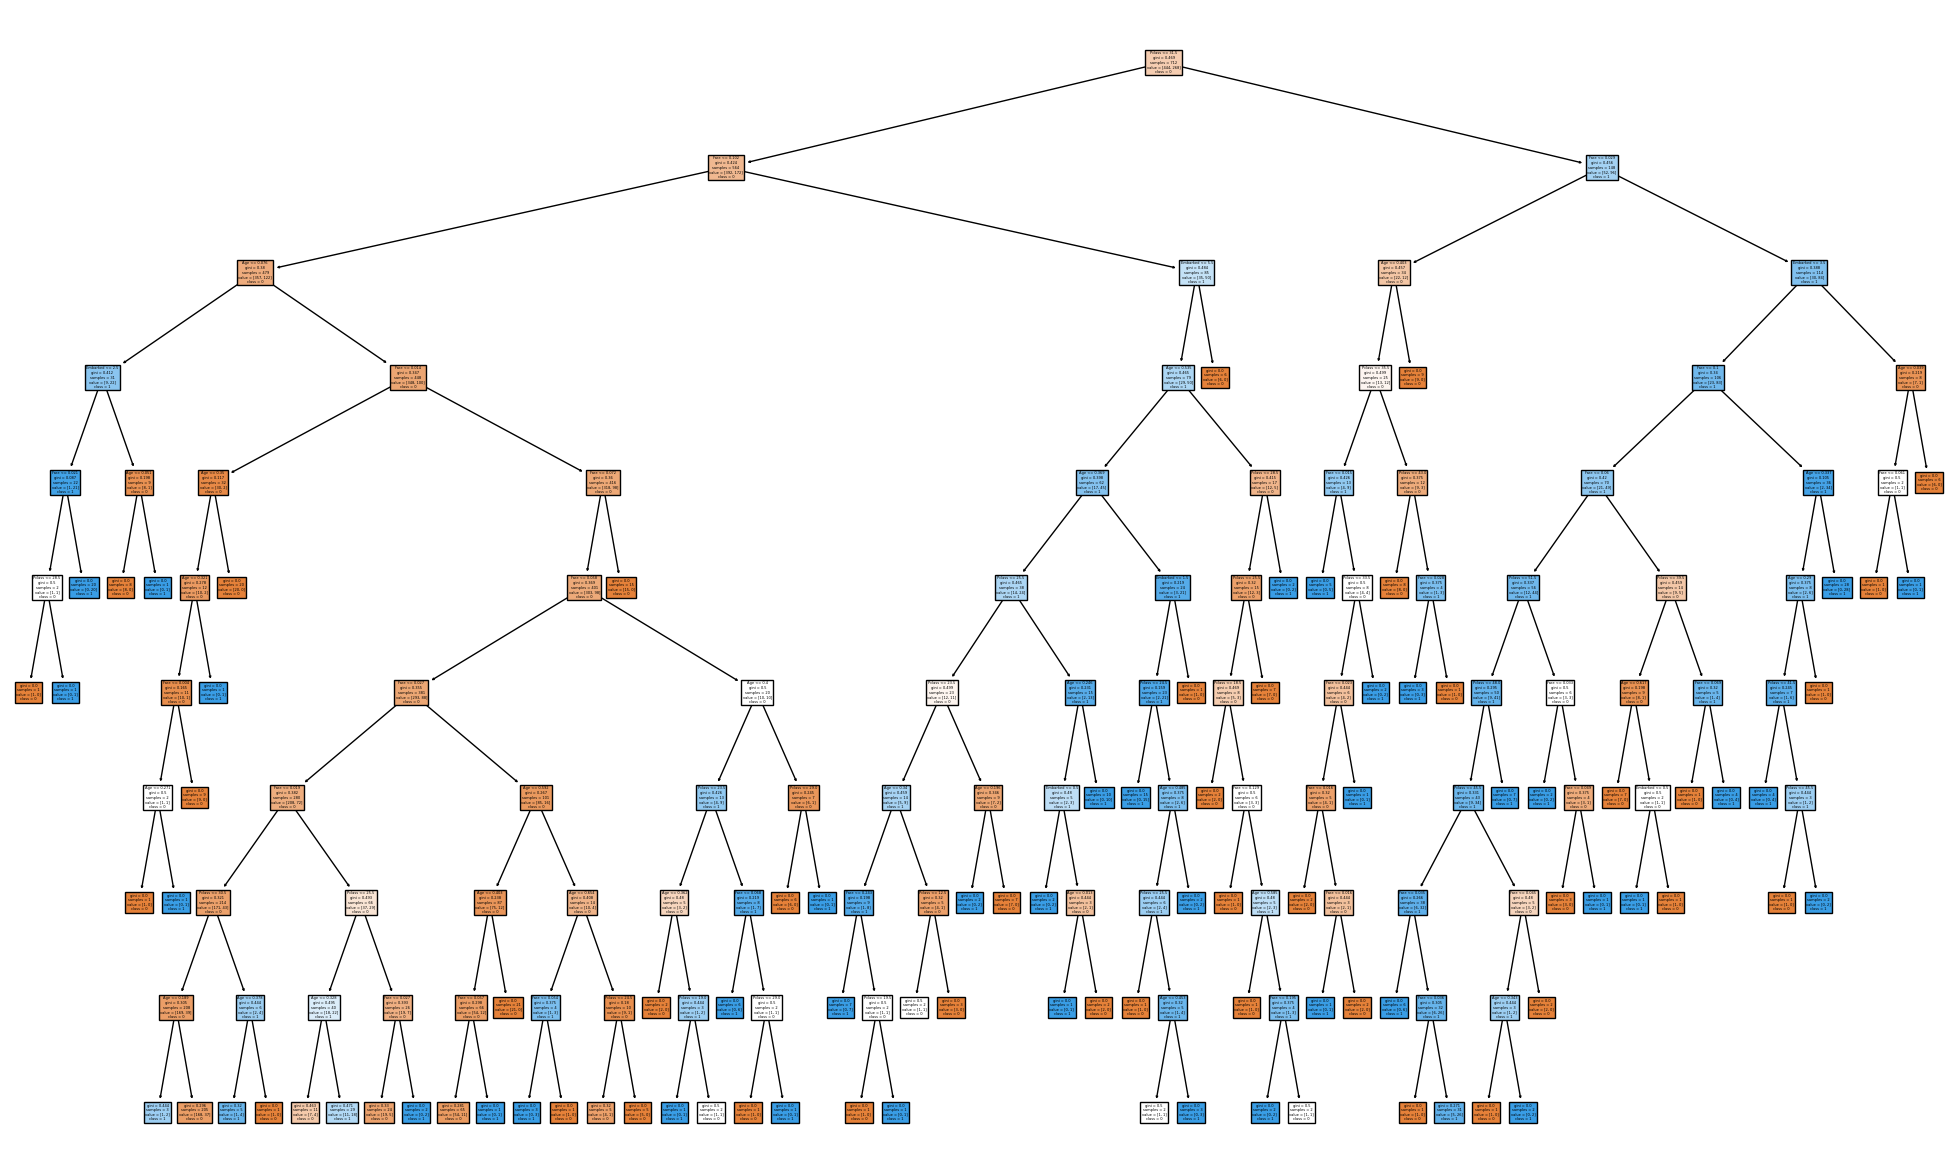

In [245]:
#Plot the tree
plt.figure(figsize=(25,15))
t = plot_tree(m, feature_names = ['Age', 'Fare','Pclass', 'Embarked', 'Parch','Sex','Name','SibSp'], class_names = ["0", "1"], filled=True)

In [246]:
##Confusion_Matrix

In [247]:
cm1 = metrics.confusion_matrix(y_test, y_pr)

In [248]:
cm_disp1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1,
                                         display_labels=m.classes_)

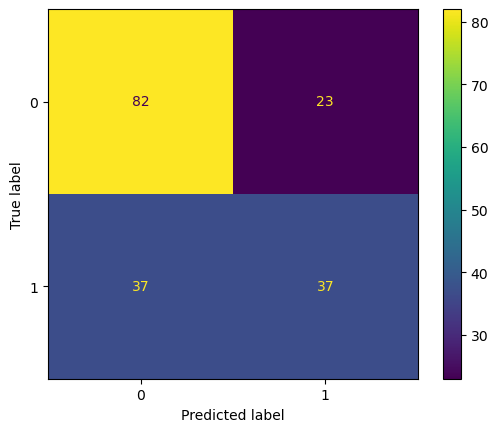

In [249]:
cm_disp1.plot()

In [250]:
#Estimation of fals positive and true positive
fpr, tpr, thresholds= roc_curve(y_test, y_pr, pos_label=m.classes_[1])

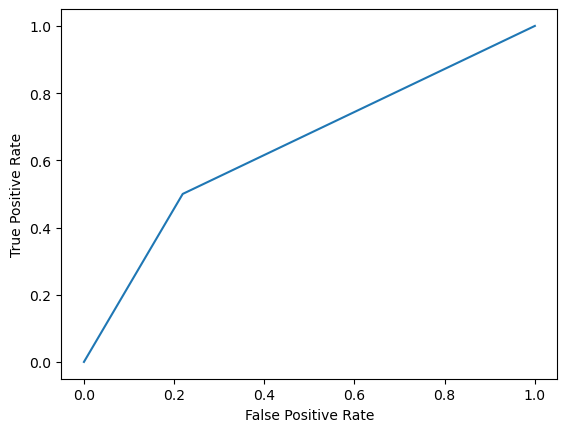

In [251]:
#Display graph
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

cat_pipe = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
)

num_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)

feature_transform = ColumnTransformer([
   ('do_nothing', 'passthrough', ['sample_number']),
    ('cat_preprocessing', cat_pipe, ['island', 'region', 'sex']),
    ('num_preprocessing', num_pipe, ['body_mass_g','culmen_length_mm'])
])

#IMPORTANT!!
X_train_trans = feature_transform.fit_transform(X_train).  #we are fitting and then transforming X_train

dm = DummyClassifier(strategy= 'most_frequent')
dm.fit(X_train_trans, y_train).    #You are fitting the model on X_train_trans
## IMPORTANT!!!!
X_test_trans = feature_transform.transform(X_test)  #Transforming X_test but not fitting the transformer on it!!!

In [21]:
# Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female

In [22]:
data_fill.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
## Given the data of a new passenger, we want to predict whether they will survive the disaster.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [28]:
# define Y and X variable 

In [29]:
X = data_fill[['Pclass','Age', 'Sex', 'SibSp', 'Parch', 'Fare']]
y = data_fill['Survived']

In [30]:
X.dtypes

Pclass      int64
Age       float64
Sex         int64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

In [31]:
#split dataset into train and test

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#value for normalizing train and test data
X_mean = X_train.mean()
X_std = X_train.std()

In [34]:
#Normalization of the data before modeling

In [35]:
X_train = (X_train-X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [36]:
#X_train.describe(include='O')

In [37]:
X_test.describe()

,Pclass,Age,Sex,SibSp,Parch,Fare
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,-0.129268,0.061631,-0.087028,-0.128473,0.014966,-0.036595
std,1.064174,1.004148,1.026639,0.621133,1.090335,0.759055
min,-1.613002,-2.209252,-1.379654,-0.470392,-0.479005,-0.627027
25%,-1.613002,-0.580107,-1.379654,-0.470392,-0.479005,-0.475095
50%,0.812463,0.012382,0.723801,-0.470392,-0.479005,-0.348017
75%,0.812463,0.497268,0.723801,0.379656,-0.479005,-0.003384
max,0.812463,3.190705,0.723801,2.929800,5.836763,4.421605


In [38]:
# classification using logistic regression model

In [39]:
m = LogisticRegression()

In [40]:
### fit/train train_data

In [41]:
m.fit(X_train, y_train)

LogisticRegression()

In [42]:
###display model coefficients 

In [43]:

m.coef_, m.intercept_

(array([[-0.78019631, -0.41573686, -1.28663316, -0.37747992, -0.11242157,
          0.17264025]]),
 array([-0.67263383]))